Was ist das Kriterium, nach dem wir unsere Hirnbilder dekodieren? In der Regel kann man sagen, dass wir immer nach *Ähnlichkeiten* schauen. Das können Ähnlichkeiten  von einem Hirnbild mit anderen Hirnbildern der selben Person sein. Oder es sind Ähnlichkeiten mit den Daten anderer Personen, z.B. aus einer Meta-Analyse. Wir können auch die Aktivierungen in einem Hirnbild mit der Lokalisation von anatomischen Regionen in einem Atlas vergleichen. Dann sehen wir, ob die Aktivierungen in anatomisch wichtige Regionen fallen.  

Ähnlichkeiten sind erst mal kontinuierlich, das heißt, dass zwei Hirnbilder gar nicht ähnlich, bisschen ähnlich, sehr ähnlich etc. sein können. Das bedeutet auch, dass die Ähnlichkeit zusätzlich mit einem Kriterium verbunden werden könnten, um Entscheidungen zu treffen; z.B. die beiden Hirnbilder die **am ähnlichsten** sind, gehören zusammen o.Ä.

###  Wir machen uns eine Liste mit allen unseren Hirnbildern

In [1]:
import os

In [2]:
imgList = ['../training/%s'%x for x in os.listdir('../training/') if x.startswith('s08')]; imgList.sort()

In [3]:
imgList

['../training/s08EMOTION_004_Negativ-Sturm.nii.gz',
 '../training/s08EMOTION_007_Positiv-Wald.nii.gz',
 '../training/s08EMOTION_013_Negativ-Klippe.nii.gz',
 '../training/s08EMOTION_016_Positiv-Strand.nii.gz',
 '../training/s08EMOTION_024_Negativ-Waldbrand.nii.gz',
 '../training/s08EMOTION_029_Positiv-See.nii.gz',
 '../training/s08EMOTION_033_Negativ-Strand.nii.gz',
 '../training/s08EMOTION_036_Positiv-Berg.nii.gz',
 '../training/s08GESICHTER_003_Bekannt-Freunde.nii.gz',
 '../training/s08GESICHTER_008_Beruehmt-Filmschauspieler.nii.gz',
 '../training/s08GESICHTER_011_Bekannt-Familie.nii.gz',
 '../training/s08GESICHTER_017_Beruehmt-Musiker.nii.gz',
 '../training/s08GESICHTER_022_Bekannt-Kommilitonen.nii.gz',
 '../training/s08GESICHTER_026_Beruehmt-Serienschauspieler.nii.gz',
 '../training/s08GESICHTER_032_Bekannt-Schulfreunde.nii.gz',
 '../training/s08GESICHTER_038_Beruehmt-Sportler.nii.gz',
 '../training/s08MOTORIK_002_Haende-Jonglieren.nii.gz',
 '../training/s08MOTORIK_006_Fuesse-Balltr

### Wir können uns - wie gewohnt - die Bilder anschauen

In [4]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from nilearn import image, datasets, input_data, plotting

Hier schauen wir uns als Beispiel das letzte Bild (-1) in unserer Liste an

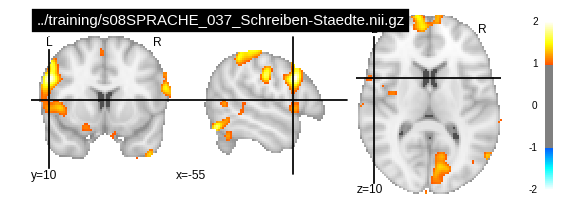

In [6]:
plotting.plot_stat_map(imgList[-1],title=imgList[-1],threshold=1,cut_coords=(-55,10,10));

### Wir extrahieren nun die Daten aus diesen Bildern

In [7]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=None).fit()

In [8]:
masker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

### Wir packen alle Daten in eine Tabelle

Wie immer gilt: eine Tabelle ist so aufgebaut, dass die Beobachtungen (Zeitpunkte) in Zeilen sind und die Feature (Voxel) in Spalten.

![](https://camo.githubusercontent.com/70dd5e35f7caaaa56b78381bc94c41fceae1ce62/687474703a2f2f7777772e616e6e75616c726576696577732e6f72672f6e613130312f686f6d652f6c697465726174756d2f7075626c69736865722f61722f6a6f75726e616c732f636f6e74656e742f6e6575726f2f323031342f6e6575726f2e323031342e33372e69737375652d312f616e6e757265762d6e6575726f2d3036323031322d3137303332352f32303134303731312f696d616765732f6d656469756d2f6e653337303433352e66312e676966)

In [9]:
import pandas as pd

In [10]:
def makeBigDf(imgList,masker):
    
    # eine leere Tabelle, in die wir unsere Ergebnisse schreiben
    bigDf = pd.DataFrame()
    # wir gehen Bild für Bild durch unsere Liste mit den Blöcken
    for img in imgList:
        # wir extrahieren alle wichtigen Informationen aus dem Dateinamen
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s_%s' % (num,content)
        # wir verwenden den 'masker', um unser Bild zu einer Liste (1D) zu machen
        thisDf = pd.DataFrame(masker.transform(img))
        # wir geben der Liste einen Index (Informationen am Anfang)
        thisDf.index = [[cond[3:]],[cont]]
        # wir packen die Liste des aktuellen Bildes in die große Tabelle, wo jedes Hirnbild eine Zeile ist
        bigDf = pd.concat([bigDf,thisDf])
        
    # nachdem wir fertig sind, sortieren wir die Tabelle nach Bedingung (die im Index steht)
    bigDf.sort_index(inplace=True)
    
    # wir geben die Tabelle aus
    return bigDf

In [11]:
blockDf = makeBigDf(imgList,masker)

In [12]:
blockDf

0         1         2       \
EMOTION   004_Negativ-Sturm                0.298437  0.280766  0.226124   
          007_Positiv-Wald                 0.050972  0.166825  0.246762   
          013_Negativ-Klippe               0.110247  0.213807  0.299219   
          016_Positiv-Strand              -0.246740 -0.144198 -0.021383   
          024_Negativ-Waldbrand           -0.478858 -0.454537 -0.469940   
          029_Positiv-See                 -0.233535 -0.269339 -0.262766   
          033_Negativ-Strand               0.435625  0.373756  0.335652   
          036_Positiv-Berg                -0.606882 -0.664675 -0.706450   
GESICHTER 003_Bekannt-Freunde              0.527384  0.333976  0.154485   
          008_Beruehmt-Filmschauspieler   -0.035392 -0.181237 -0.345604   
          011_Bekannt-Familie             -0.245975 -0.265224 -0.228848   
          017_Beruehmt-Musiker             0.174054  0.072537 -0.044816   
          022_Bekannt-Kommilitonen         0.649833  0.590912  0.508608   
          026_Beruehmt-Serienschauspieler -0.157659 -0.165157 -0.122029   
          032_Bekannt-Schulfreunde         0.497532  0.417292  0.332710   
          038_Beruehmt-Sportler           -0.090964 -0.072964 -0.034429   
MOTORIK   002_Haende-Jonglieren           -0.660450 -0.621550 -0.549074   
          006_Fuesse-Balltreten           -0.532900 -0.385512 -0.217303   
          012_Haende-Kanu                  0.085867  0.151571  0.272488   
          018_Fuesse-Fahrrad               0.023669  0.060825  0.059634   
          021_Haende-Boxen                -0.991997 -0.923105 -0.806034   
          028_Fuesse-Hochseil             -0.093036 -0.036726  0.059131   
          034_Haende-Ballwerfen            0.179763  0.189151  0.198696   
          039_Fuesse-Trampolin            -0.538071 -0.568671 -0.603332   
RUHE      005_Ruhe                         0.069575  0.037061  0.008005   
          010_Ruhe                        -0.585204 -0.565841 -0.550450   
          015_Ruhe                         0.323075  0.187385  0.084478   
          020_Ruhe                        -0.383987 -0.471538 -0.561678   
          025_Ruhe                         0.114412  0.085152  0.034121   
          030_Ruhe                         0.738058  0.665159  0.511289   
          035_Ruhe                         0.504715  0.602311  0.692033   
          040_Ruhe                        -0.271100 -0.235799 -0.260020   
SPRACHE   001_Sprechen-Tiere              -0.062860 -0.123455 -0.174932   
          009_Schreiben-Lebensmittel       0.481040  0.696451  0.866260   
          014_Sprechen-Staedte             0.377749  0.280495  0.126578   
          019_Schreiben-Vornamen           0.295741  0.319224  0.356477   
          023_Sprechen-Lebensmittel        0.343107  0.386100  0.416588   
          027_Schreiben-Tiere             -0.010171 -0.005099 -0.053600   
          031_Sprechen-Vornamen           -0.231322 -0.213443 -0.191721   
          037_Schreiben-Staedte            0.511774  0.592085  0.735193   

                                             3         4         5       \
EMOTION   004_Negativ-Sturm                0.300763  0.249581  0.364199   
          007_Positiv-Wald                 0.006890  0.110656 -0.215160   
          013_Negativ-Klippe               0.130578  0.247793 -0.026233   
          016_Positiv-Strand              -0.227940 -0.132042 -0.254361   
          024_Negativ-Waldbrand           -0.593110 -0.522689 -0.741202   
          029_Positiv-See                 -0.297636 -0.331669 -0.324384   
          033_Negativ-Strand               0.409288  0.339520  0.407197   
          036_Positiv-Berg                -0.668864 -0.695710 -0.666422   
GESICHTER 003_Bekannt-Freunde              0.554090  0.389571  0.773092   
          008_Beruehmt-Filmschauspieler   -0.120628 -0.247874 -0.174254   
          011_Bekannt-Familie             -0.165657 -0.164262 -0.091647   
          017_Beruehmt-Musiker             0.293535  0.180042  0.4508

## Korrelation

Korrelationen sind Ähnlichkeiten, die sich aus ähnlichen Mustern ergeben. D.h. die Verteilung der Daten ist wichtig, nicht ihre absoluten Werte.
Welche Ähnlichkeiten interessieren uns hier? Uns insteressiert wie sich jede Beobachtung (Zeile) zu allen anderen verhält.  

Wir können jeden Block mit jedem anderen korrelieren, was bedeutet, dass wir für jeden Voxel abtragen, welchen Wert dieser Voxel z.B. im Block "Lebensmittel" hat und welchen Wert er im Block "Jonglieren" hat. Und wenn wir diesen Wert für jeden Voxel abtragen, kriegen wir ein Streudiagramm, wie wir das von Korrelationen kennen.

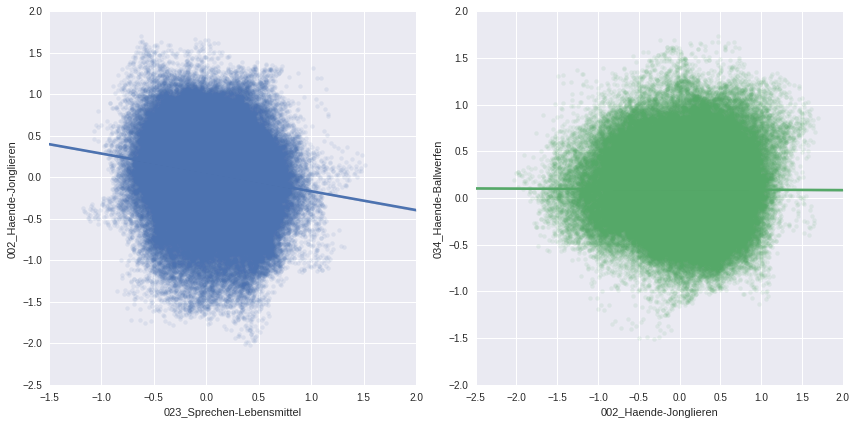

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

sns.regplot(blockDf.ix['SPRACHE'].ix['023_Sprechen-Lebensmittel'],
            blockDf.ix['MOTORIK'].ix['002_Haende-Jonglieren'],
            scatter_kws={"alpha": 0.1},ax=ax1);

sns.regplot(blockDf.ix['MOTORIK'].ix['002_Haende-Jonglieren'],
            blockDf.ix['MOTORIK'].ix['034_Haende-Ballwerfen'],
            scatter_kws={"alpha": 0.1});

plt.tight_layout()
plt.show()

Wir haben 40 Blöcke, das heißt, dass wir jeden Block mit jedem anderen korrelieren, was uns eine 40x40 Korrelationsmatrix gibt:

In [14]:
corrDf = blockDf.T.corr()

In [15]:
corrDf

EMOTION                   \
                                          004_Negativ-Sturm 007_Positiv-Wald   
EMOTION   004_Negativ-Sturm                        1.000000        -0.047331   
          007_Positiv-Wald                        -0.047331         1.000000   
          013_Negativ-Klippe                       0.036674        -0.034101   
          016_Positiv-Strand                      -0.083108         0.139007   
          024_Negativ-Waldbrand                    0.176156         0.224822   
          029_Positiv-See                         -0.085244        -0.003413   
          033_Negativ-Strand                       0.223163        -0.284653   
          036_Positiv-Berg                        -0.174194         0.163704   
GESICHTER 003_Bekannt-Freunde                      0.062531        -0.190805   
          008_Beruehmt-Filmschauspieler           -0.034680         0.471902   
          011_Bekannt-Familie                     -0.211401        -0.252492   
          017_Beruehmt-Musiker                    -0.154696        -0.076896   
          022_Bekannt-Kommilitonen                 0.080466         0.066672   
          026_Beruehmt-Serienschauspieler         -0.228980        -0.103954   
          032_Bekannt-Schulfreunde                 0.093030        -0.051497   
          038_Beruehmt-Sportler                    0.032584        -0.070274   
MOTORIK   002_Haende-Jonglieren                    0.189781        -0.215011   
          006_Fuesse-Balltreten                   -0.192482         0.177458   
          012_Haende-Kanu                         -0.106523        -0.252604   
          018_Fuesse-Fahrrad                       0.297243        -0.033675   
          021_Haende-Boxen                        -0.041982        -0.023766   
          028_Fuesse-Hochseil                     -0.172567        -0.137990   
          034_Haende-Ballwerfen                   -0.126864        -0.221238   
          039_Fuesse-Trampolin                     0.123130         0.130932   
RUHE      005_Ruhe                                -0.209668        -0.100726   
          010_Ruhe                                -0.067578        -0.024501   
          015_Ruhe                                 0.071541        -0.384294   
          020_Ruhe                                 0.068248         0.144577   
          025_Ruhe                                 0.100515         0.046460   
          030_Ruhe                                 0.247326         0.043166   
          035_Ruhe                                 0.105900         0.073868   
          040_Ruhe                                -0.098592         0.174180   
SPRACHE   001_Sprechen-Tiere                      -0.324921        -0.401831   
          009_Schreiben-Lebensmittel               0.178740         0.254384   
          014_Sprechen-Staedte                    -0.287954        -0.047863   
          019_Schreiben-Vornamen                   0.137862        -0.156370   
          023_Sprechen-Lebensmittel               -0.053127         0.121076   
          027_Schreiben-Tiere                      0.001457        -0.025420   
          031_Sprechen-Vornamen                   -0.078680        -0.064069   
          037_Schreiben-Staedte                   -0.149907        -0.203127   

                                                              \
                                          013_Negativ-Klippe   
EMOTION   004_Negativ-Sturm                         0.036674   
          007_Positiv-Wald                         -0.034101   
          013_Negativ-Klippe                        1.000000   
          016_Positiv-Strand                       -0.018961   
          024_Negativ-Waldbrand                     0.190122   
          029_Positiv-See                           0.079080   
          033_Negativ-Strand                        0.116569   
          036_Positiv-Berg                          0.101439   
GESICHTER 003_Bekannt-Freunde                      

### Das selbe als Abbildung

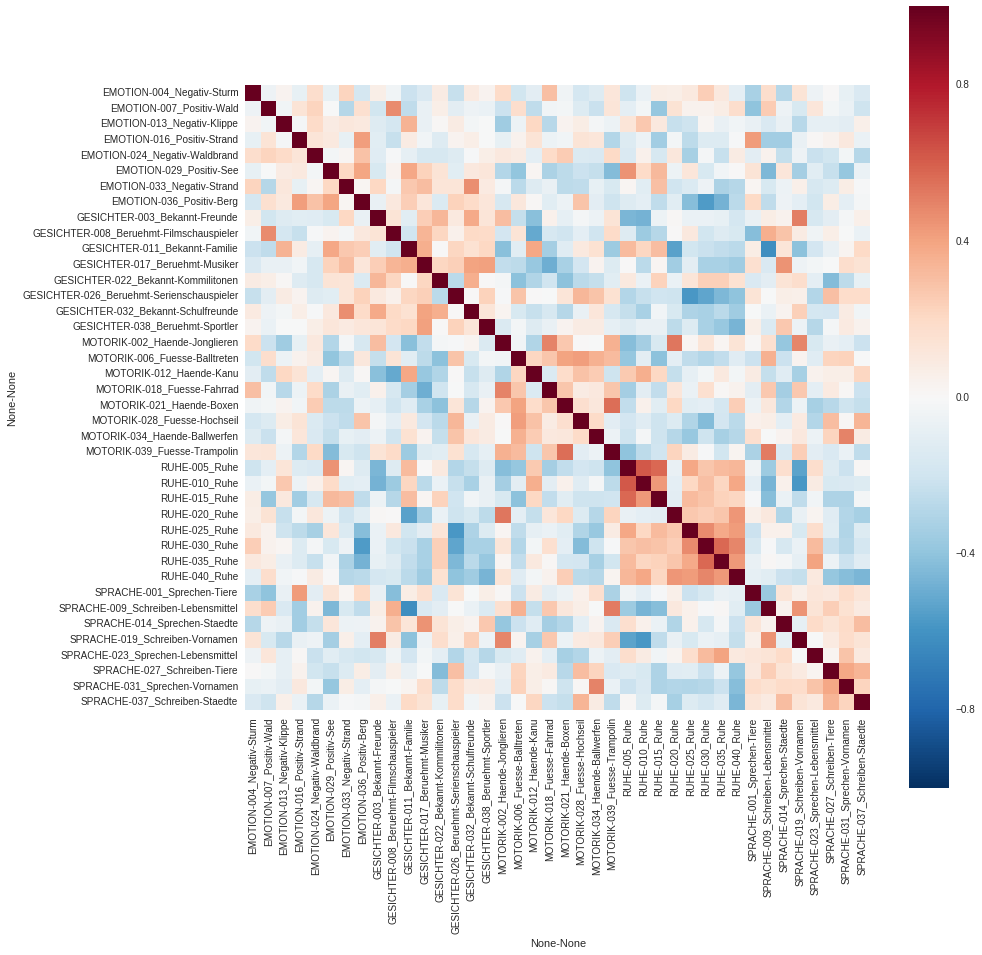

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(corrDf,square=True)
plt.show()

Hier können wir schon erkennen, dass Blöcke der selben Bedingung tendenziell miteinander korrelieren. Hohe Korrelationen sind rot und wir sehen, dass sich ganz nette rote Cluster bilden, z.B. für die Ruhe.

## Ähnlichkeit von Template und einzelnem Block

Wir könnten jetzt zusätzlich schauen, wie gut jeder Block mit einem Template korreliert. Dieses Template hat den Vorteil, dass es eine sehr eindeutige Repräsentation der Bedingung ist und dass es für jede Bedingung nur ein Template gibt. In der Matrix oben kann jeder 30-Sekunden Block mit den 39 anderen Blöcken irgendwie korreliert sein. Das ist zum einen zu verwirrend, zum anderen sind die anderen 30-Sekunden Blöcke keine gute Repräsentation des jeweiligen kognitiven Prozesses. Eine bessere Repräsentation könnten z.B. die gemittelten Daten sein, oder eine Karte aus Neurosynth etc.

Versuchen wir es mit unseren Durchschnittsaktivierungen für jeden Block: 

### So sehen unsere gemittelten Bilder aus:

In [17]:
meanDf = blockDf.groupby(level=0).mean()

In [18]:
meanDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
EMOTION,-0.083842,-0.062199,-0.044098,-0.117504,-0.091820,-0.182046,-0.155793,-0.128164,-0.177921,-0.285265,...,-0.296846,-0.273916,0.005393,0.006040,-0.014577,-0.036179,-0.049874,-0.055162,-0.083124,-0.091991
GESICHTER,0.164852,0.091267,0.027510,0.187357,0.115185,0.259627,0.181434,0.117873,0.133226,0.049486,...,-0.085039,-0.177642,0.009118,-0.007545,0.006347,0.042380,-0.035250,-0.058987,-0.049230,-0.106148
MOTORIK,-0.315894,-0.266752,-0.198224,-0.307015,-0.269044,-0.300096,-0.278557,-0.254481,-0.233993,-0.128765,...,0.114591,0.187289,-0.123460,-0.199184,-0.270121,-0.315490,-0.100667,-0.164126,-0.236302,-0.078001
RUHE,0.063693,0.037986,-0.005278,0.038397,0.032061,-0.001692,0.028414,0.045623,0.012645,0.319307,...,0.059163,0.117034,-0.123078,-0.109827,-0.093289,-0.089086,-0.117184,-0.114330,-0.106809,-0.130306
SPRACHE,0.213132,0.241545,0.260105,0.243910,0.256702,0.272072,0.268158,0.257865,0.309031,0.064018,...,0.197580,0.151502,0.200699,0.301715,0.383684,0.422817,0.259056,0.359111,0.455857,0.375155


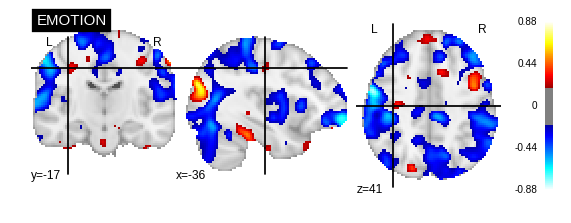

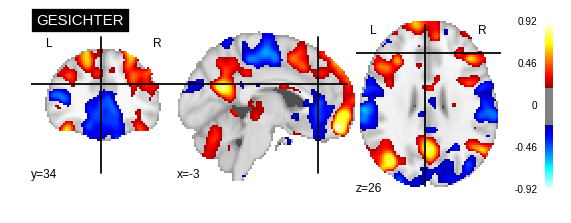

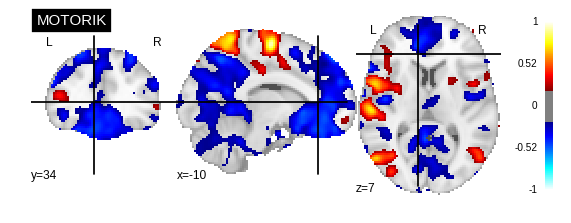

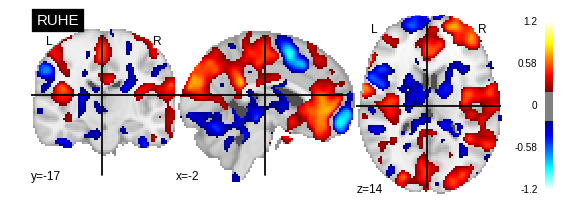

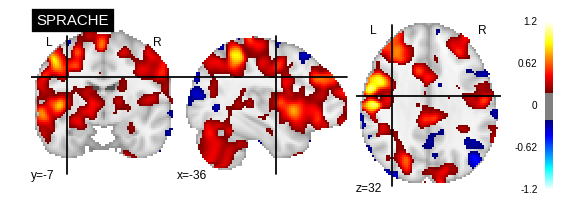

In [19]:
for i in meanDf.index:
    thisDf = meanDf.loc[i]
    thisIm = masker.inverse_transform(thisDf)
    plotting.plot_stat_map(thisIm,title=i,threshold=0.2)
    plt.show()

### Jetzt korrelieren wir alle 40 Blöcke mit allen 5 Templates

In [21]:
import numpy as np

In [22]:
# hier verwenden wir die funktion corrcoef um alles mit allem zu korrelieren,
# und werfen diejenigen korrelationen weg, die uns nicht interessieren (die ersten
# fünf zeilen sind korrelationen der gemittelten blöcke mit sich selbst und alles ab
# der fünften spalte sind die korrelationen der einzelblöcke mit sich selbst (so wie oben) )
# daher 5:,:5 --> ab der fünften zeile und bis zur fünften spalte
myCorrDf = pd.DataFrame(np.corrcoef(meanDf,blockDf)[5:,:5],
                        index=blockDf.index,
                        columns=meanDf.index)

In [23]:
myCorrDf

EMOTION  GESICHTER   MOTORIK  \
EMOTION   004_Negativ-Sturm                0.220461  -0.087723 -0.002346   
          007_Positiv-Wald                 0.375646  -0.049108 -0.132474   
          013_Negativ-Klippe               0.338755   0.016162 -0.098105   
          016_Positiv-Strand               0.503775  -0.076745 -0.021455   
          024_Negativ-Waldbrand            0.515046  -0.148471  0.113164   
          029_Positiv-See                  0.518161   0.202572 -0.509153   
          033_Negativ-Strand               0.302105   0.385873 -0.302171   
          036_Positiv-Berg                 0.705779   0.193655 -0.068415   
GESICHTER 003_Bekannt-Freunde             -0.153823   0.515302 -0.083670   
          008_Beruehmt-Filmschauspieler    0.076182   0.466202 -0.243797   
          011_Bekannt-Familie              0.224195   0.424456 -0.175227   
          017_Beruehmt-Musiker             0.070987   0.780084 -0.482561   
          022_Bekannt-Kommilitonen        -0.005752   0.458665 -0.465193   
          026_Beruehmt-Serienschauspieler -0.009093   0.336002  0.269632   
          032_Bekannt-Schulfreunde         0.243318   0.641853 -0.240847   
          038_Beruehmt-Sportler            0.101169   0.537495 -0.081238   
MOTORIK   002_Haende-Jonglieren           -0.251507  -0.189097  0.431019   
          006_Fuesse-Balltreten           -0.124750  -0.201833  0.694577   
          012_Haende-Kanu                 -0.068155  -0.365494  0.325203   
          018_Fuesse-Fahrrad              -0.129283  -0.351811  0.544210   
          021_Haende-Boxen                -0.131948  -0.318039  0.736040   
          028_Fuesse-Hochseil             -0.091335  -0.045820  0.466878   
          034_Haende-Ballwerfen           -0.236477   0.037741  0.428612   
          039_Fuesse-Trampolin            -0.233125  -0.115091  0.552580   
RUHE      005_Ruhe                        -0.036819  -0.172356 -0.454392   
          010_Ruhe                         0.020400  -0.365161 -0.125008   
          015_Ruhe                        -0.137787  -0.001467 -0.303093   
          020_Ruhe                        -0.081125  -0.390539  0.097959   
          025_Ruhe                        -0.310181  -0.259157 -0.235181   
          030_Ruhe                        -0.236411  -0.404380 -0.173117   
          035_Ruhe                        -0.320162  -0.381803 -0.226263   
          040_Ruhe                        -0.133575  -0.477081 -0.042146   
SPRACHE   001_Sprechen-Tiere              -0.000907  -0.060268 -0.109638   
          009_Schreiben-Lebensmittel      -0.271677  -0.178900  0.304045   
          014_Sprechen-Staedte            -0.253879   0.338967 -0.379367   
          019_Schreiben-Vornamen          -0.231867   0.108422  0.190982   
          023_Sprechen-Lebensmittel       -0.186784  -0.293165 -0.262781   
          027_Schreiben-Tiere             -0.135248  -0.119136  0.072001   
          031_Sprechen-Vornamen           -0.169832   0.060334  0.084568   
          037_Schreiben-Staedte           -0.199715   0.105687 -0.079451   

                                               RUHE   SPRACHE  
EMOTION   004_Negativ-Sturm                0.039538 -0.124986  
          007_Positiv-Wald                -0.000041 -0.124984  
          013_Negativ-Klippe              -0.003380 -0.208487  
          016_Positiv-Strand              -0.213394 -0.074331  
          024_Negativ-Waldbrand           -0.127487 -0.247985  
          029_Positiv-See                  0.158963 -0.359984  
          033_Negativ-Strand              -0.168399 -0.099206  
          036_Positiv-Berg                -0.460506 -0.108629  
GESICHTER 003_Bekannt-Freunde             -0.271515  0.097578  
          008_Beruehmt-Filmschauspieler   -0.231093  0.083403  
          011_Bekannt-Familie             -0.127056 -0.263419  
          017_Beruehmt-Musiker            -0.341931  0.154215  
          022_Bekannt-Kommilitonen         0.189437 -0.211341  
          026_Beruehmt-Seriensc

### Und als Abbildung:

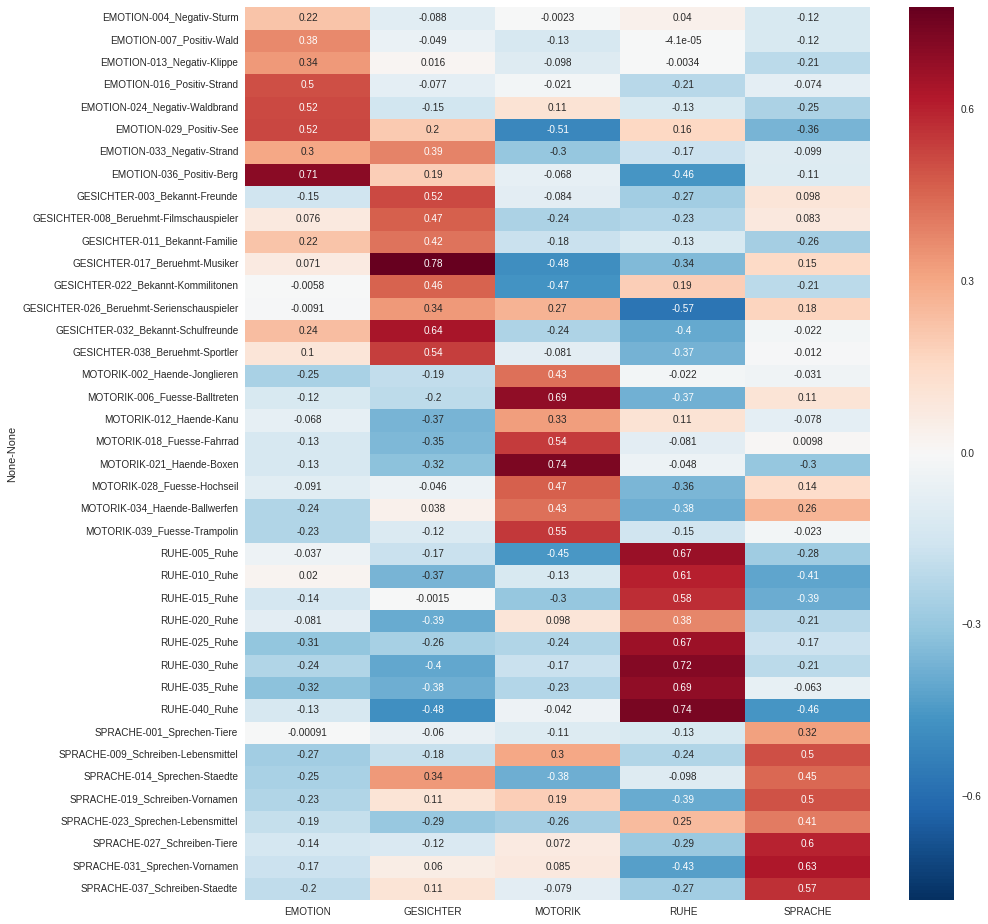

In [24]:
plt.figure(figsize=(14,16))
sns.heatmap(myCorrDf,annot=True)
plt.show()

## Entscheidungsregel

Das ist die einfachste Art eine Entscheidung zu treffen: Wir sagen, dass der Block am besten zu demjenigen gemittelten Aktivierungsmuster passt, mit dem er am höchsten korreliert.

In [25]:
def makeCorrPred(myCorrDf):
    
    d = {}
    
    # wir gehen durch jede Zeile
    for cond,num in myCorrDf.index:
        
        # wir wählen diese Zeile aus
        thisDf = myCorrDf.ix[cond].ix[num]
        
        # wir wählen die Spalte mit dem höhsten Wert aus
        winner = thisDf.idxmax()
        
        # wir schreiben einen eintrag mit folgenden infos:
        ### real : die tatsächliche bedingung (aus der zeile)
        ### winner: die spalte mit der höchsten korrelation
        ### hit: wir fragen, ob real und winner identisch sind (kann wahr oder falsch sein)
        d[num] = {'real':cond, 'winner':winner,'hit':cond==winner  }
        
    # wir packen das ganze in eine tabelle, die wir nett formatieren
    predDf = pd.DataFrame(d).T

    # wir rechnen aus, in wie viel prozent der Fälle wir richig lagen
    percentCorrect = np.mean( [int(x) for x in predDf['hit']] )*100
    
    return predDf,percentCorrect

In [26]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)

In [27]:
corrPredDf

,hit,real,winner
001_Sprechen-Tiere,True,SPRACHE,SPRACHE
002_Haende-Jonglieren,True,MOTORIK,MOTORIK
003_Bekannt-Freunde,True,GESICHTER,GESICHTER
004_Negativ-Sturm,True,EMOTION,EMOTION
005_Ruhe,True,RUHE,RUHE
006_Fuesse-Balltreten,True,MOTORIK,MOTORIK
007_Positiv-Wald,True,EMOTION,EMOTION
008_Beruehmt-Filmschauspieler,True,GESICHTER,GESICHTER
009_Schreiben-Lebensmittel,True,SPRACHE,SPRACHE
010_Ruhe,True,RUHE,RUHE


In [28]:
print '%i%% richtig' % corrPcCorrect

97% richtig


## Warum ist das keine gute Idee?

Vorhersagen machen wir für *neue* Daten, bzw. Daten die wir nicht verwendet haben um die Vorhersage zu machen. Unsere Vorhersage war, dass die Blöcke so aussehen wie die Mittlung über alle Blöcke. Da jeder Block in die Mittlung eingeht mit der er dann verglichen wird, ist das keine Vorhersage. Und es kann sehr irreführend sein, z.B. wenn wir Zufallsrauschen vorhersagen könnten, weil wir das selbe Zufallsrauschen verwenden um die Mittlung zu machen und um die Blöcke vorherzusagen. Generell gilt: **die Daten korrelieren am besten mit sich selbst und die beste Beschreibung der Daten sind die Daten selbst**. Wenn das so ist, dann bräuchten wir gar nicht zu machen, denn die *"Daten sprechen für sich selbst"*. Das ist aber so ähnlich wie [Kaffesatzlesen](http://andrewgelman.com/2016/09/21/what-has-happened-down-here-is-the-winds-have-changed/), weshalb wir damit nicht zufrieden sein sollten.

Die Lösung für eine realistisches Maß an Vorhersagbarkeit ist **Training/Testing**.
Letztlich machen wir so das, was wir ultimativ auch machen wollen, nämlich einen neuen Block vorhersagen. Diese Vorhersage können wir üben, indem wir unsere Trainingsdaten wiederum in Training und Testdaten aufteilen. Z.B. die erste Hälfte (run1) um die Vorhersage zu machen (hier:Mittlung) und die zweite Hälfte (run2) um die Vorhersagegenauigkeit zu prüfen (hier: Vergleich jedes Blocks mit der unabhängigen Mittelung). 

Wir können dem auch einen Namen geben: ["Nested Cross-Validation"](http://stats.stackexchange.com/questions/65128/nested-cross-validation-for-model-selection), wir Teilen einen Teil der Daten in Training (run1+run2) und Test (run3+run4) und teilen den Trainingsteil in Training (run1) und Test (run2); und das könnte so weiter gehen (z.B. die erste Hälfte von run 1 vs. die zweite Hälfte), bis wir nicht mehr genug Daten haben um sie sinnvoll aufzuteilen.